In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os as os
import datetime
import seaborn as sns

sns.set_style('darkgrid')
sensor_labels = ['3.3V 10A', '12V 10A', 'Ext 12V 20A', 'USB-C 20V 5A']
line_color = ['b', 'r', 'k', 'k']

## read data

In [2]:
def plot_power_over_time(sensor, fig, ax):
    #no_load = [i for i,x in enumerate(i_set) if x==0][0] 
    pwr_err = [powers[i] -np.mean(powers) for i in range(len(powers))]
    min_err = [pwr_min[i] -np.mean(powers) for i in range(len(powers))]
    max_err = [pwr_max[i] -np.mean(powers) for i in range(len(powers))]
    #err_min = [expt_power[cnt] - pwr_min[cnt]  for cnt in range(len(i_set))]
    #err_max = [expt_power[cnt] - pwr_max[cnt]  for cnt in range(len(i_set))]
    #err_pwr = [expt_power[cnt] - powers[cnt] for cnt in range(len(i_set))]
    xas = [ (time_scale[cnt]-time_scale[0])/(60*60) for cnt in range(len(time_scale))]
    ax.plot(xas, min_err, linestyle='dashed',  c=line_color[sensor])
    ax.plot(xas, pwr_err, label=f"{sensor_labels[sensor]} AVG ", c=line_color[sensor])
    ax.plot(xas, max_err, linestyle='dashed', label=f"{sensor_labels[sensor]} peak ", c=line_color[sensor])
    ax.set(xlabel="Time (Hour)", ylabel="Power error (W)",
           title="Power error over time.")
    ax.grid(True)
    ax.legend(loc="upper right")
    stri = f"Sensor: {sensor_labels[sensor]}; "
    stri += f"min-max power_AVG +/- {((np.max(pwr_err)-np.min(pwr_err))/2):4.3f}W; "
    stri += f"min-max power_delta +/- {np.max(np.abs([max_err, min_err])):4.3f}W"
    print(stri) 

In [34]:
def read_datafile(file_name, sensor):
    with open(file_name, newline='') as csvfile:
        data = []
        reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in reader:
            data.append(row)
    data = np.array(data[1:])
    volt = [float(dat) for dat in data.transpose()[4+1+sensor*3].flatten()]
    current = [float(dat) for dat in data.transpose()[4+sensor*3].flatten()]
    power = [volt[cnt]*current[cnt] for cnt in range(len(volt))]
    time = [float(dat) for dat in data.transpose()[1].flatten()]
    dtime = [float(dat) for dat in data.transpose()[2].flatten()]
    return volt, current, power, time, dtime

In [35]:
#file_location = 'D:/Users/Schoonderbeek/Downloads/PowerSensor3_sweeps/5A_24hours/'
#file_location = 'D:/GIT/powersensor3/Measurements/Sweeps/long_term/'
file_location = 'M:/VIEWlogic/Projects/PowerSensor/Measurements/Sweep_Set3/'
sensor = 1 # 12V 7.5 A
#sensor = 0 # 3V3 5 A
#process_files = ['PCIe_set3_S2_8A.csv'] #['PCIe_set2_lt_1.csv']
process_files = ['step_100Hz_80pr_8A.csv']
voltages=[]
currents=[]
cur_max=[]
cur_min=[]
volt_max=[]
volt_min=[]
time_scale=[]
powers=[]
pwr_max=[]
pwr_min=[]
for file_name in process_files:
    current=[]
    file_name = file_location + file_name
    file_time = os.path.getmtime(file_name)
    time_scale.append(os.path.getmtime(file_name))
    volt, current, power, time, dtime = read_datafile(file_name, sensor)
    voltages.append(np.mean(volt))
    volt_max.append(np.max(volt))
    volt_min.append(np.min(volt))
    currents.append(np.mean(current))
    cur_max.append(np.max(current))
    cur_min.append(np.min(current))
    powers.append(np.mean(power))
    pwr_max.append(np.max(power))
    pwr_min.append(np.min(power))

    order = np.argsort(time_scale)
    print(order)
    currents = [ currents[this] for this in order]
    voltages = [ voltages[this] for this in order]
    cur_max = [ cur_max[this] for this in order]
    cur_min = [ cur_min[this] for this in order]
    volt_max = [ volt_max[this] for this in order]
    volt_min = [ volt_min[this] for this in order]
    powers = [ powers[this] for this in order]
    pwr_max = [ pwr_max[this] for this in order]
    pwr_min = [ pwr_min[this] for this in order]

    time_scale = [time_scale[this] for this in order]


[0]


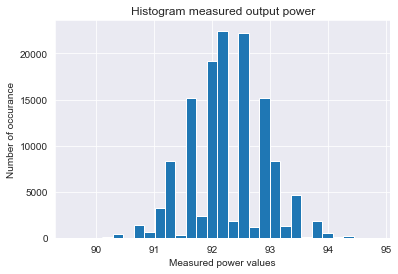

In [36]:
steps = 30
bins = [np.min(power) + cnt*(np.max(power) - np.min(power))/steps for cnt in range(steps) ]
plt.figure(6)
plt.hist(power, bins)
plt.xlabel("Measured power values")
plt.ylabel("Number of occurance")
plt.grid(True)
plt.title(f"Histogram measured output power")
plt.show()

In [37]:
def avg_data_calc(avg_samples = 32, power=power):
    tot_samples = int(len(power)/avg_samples)*avg_samples
    avg_data = np.mean(np.array(power[:tot_samples]).reshape(-1,avg_samples),axis=1)
    return avg_data, tot_samples

Avg Samples:   1, tot samples: 130862, min: 89.562, max: 94.988, peak-peak: 5.427, std: 0.651
Avg Samples:   2, tot samples: 130862, min: 90.404, max: 94.230, peak-peak: 3.826, std: 0.466
Avg Samples:   4, tot samples: 130860, min: 90.809, max: 93.685, peak-peak: 2.876, std: 0.333
Avg Samples:   8, tot samples: 130856, min: 91.282, max: 93.158, peak-peak: 1.877, std: 0.242
Avg Samples:  16, tot samples: 130848, min: 91.606, max: 92.903, peak-peak: 1.297, std: 0.164
Avg Samples:  32, tot samples: 130848, min: 91.850, max: 92.667, peak-peak: 0.817, std: 0.116
Avg Samples:  64, tot samples: 130816, min: 91.948, max: 92.548, peak-peak: 0.600, std: 0.084
Avg Samples: 128, tot samples: 130816, min: 92.072, max: 92.481, peak-peak: 0.409, std: 0.061


C:\Users\Schoonderbeek\AppData\Local\Temp\ipykernel_64764\4086896327.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


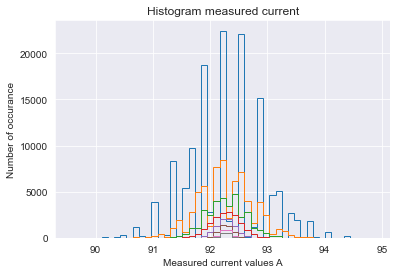

In [39]:
fig, ax = plt.subplots()
def plot_histogram(data, type_data, steps):
    if type_data == "power":
        unit = 'W'
    elif type_data == "current":
        unit = 'A'
    elif type_data == "voltage":
        unit = 'V'
    else:
        unit = ' '
    steps_histogram = 50
    bins = [np.min(data) + cnt*(np.max(data) - np.min(data))/steps_histogram for cnt in range(steps_histogram) ]
    for cnt in range(steps):
        avg_samples = 2**cnt
        avg_data, tot_samples = avg_data_calc(avg_samples, data)
        stri = f"Avg Samples: {avg_samples:3}, tot samples: {tot_samples}, min: {np.min(avg_data):5.3f}, max: {np.max(avg_data):5.3f}, " 
        stri += f"peak-peak: {np.max(avg_data)-np.min(avg_data):5.3f}, std: {np.std(avg_data):5.3f}"
        print(stri)
        ax.hist(avg_data, bins, histtype='step')

    ax.set(xlabel=f"Measured {type_data} values {unit}" , ylabel="Number of occurance",
           title=f"Histogram measured {type_data}")

plot_histogram(power, "current", 8)
ax.grid(True)
fig.show()

Sample frequency: 24.26 kHz
(4096, 31)


C:\Users\Schoonderbeek\AppData\Local\Temp\ipykernel_64764\4171752821.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


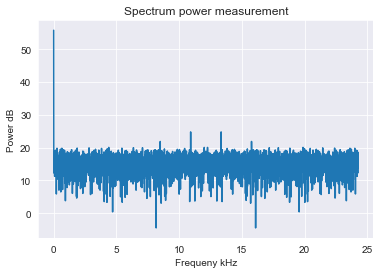

In [40]:
fig, ax = plt.subplots()
points=4096
sample_frequency = [1/(time[n+1] - time[n]) for n in range(len(time)-1)]
fs = np.mean(sample_frequency)/1000
print(f"Sample frequency: {fs:4.2f} kHz")
block = int(len(power)/points)
rshape_power = np.resize(power[:block*points],(points,block))
print(np.shape(rshape_power))
f_power = np.mean(np.fft.fft2((rshape_power)),1)
fas = [n*fs/points for n in range(points)]

ax.plot(fas, 10*np.log10(abs(f_power)), label="Max.")
ax.set(xlabel=f"Frequeny kHz" , ylabel="Power dB", title=f"Spectrum power measurement")


ax.grid(True)
fig.show()